In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank = pd.read_csv('bank.csv', sep=';')
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
bank['y'].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

In [8]:
bank.groupby('job')['y'].value_counts()

job            y  
admin.         no     420
               yes     58
blue-collar    no     877
               yes     69
entrepreneur   no     153
               yes     15
housemaid      no      98
               yes     14
management     no     838
               yes    131
retired        no     176
               yes     54
self-employed  no     163
               yes     20
services       no     379
               yes     38
student        no      65
               yes     19
technician     no     685
               yes     83
unemployed     no     115
               yes     13
unknown        no      31
               yes      7
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

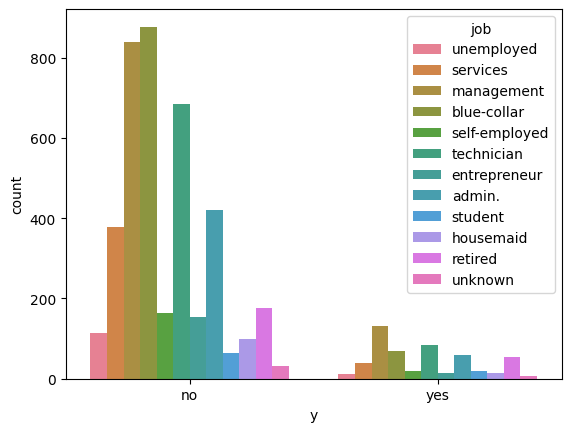

In [9]:
sns.countplot(x='y', hue='job', data=bank)


In [10]:
bank.groupby('education')['y'].value_counts()

education  y  
primary    no      614
           yes      64
secondary  no     2061
           yes     245
tertiary   no     1157
           yes     193
unknown    no      168
           yes      19
Name: count, dtype: int64

<Axes: xlabel='education', ylabel='count'>

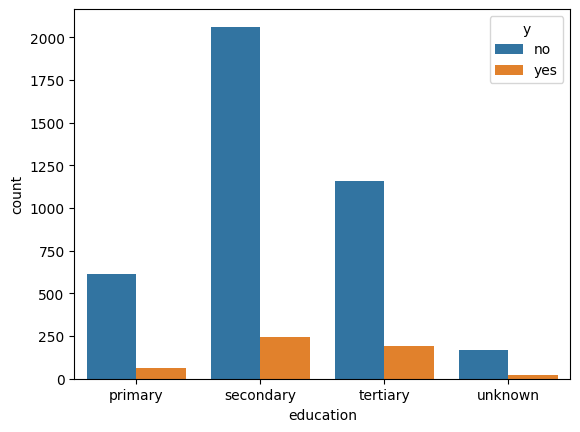

In [11]:
sns.countplot(x='education', hue='y', data=bank)


In [12]:
bank.groupby('marital')['y'].value_counts()

marital   y  
divorced  no      451
          yes      77
married   no     2520
          yes     277
single    no     1029
          yes     167
Name: count, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

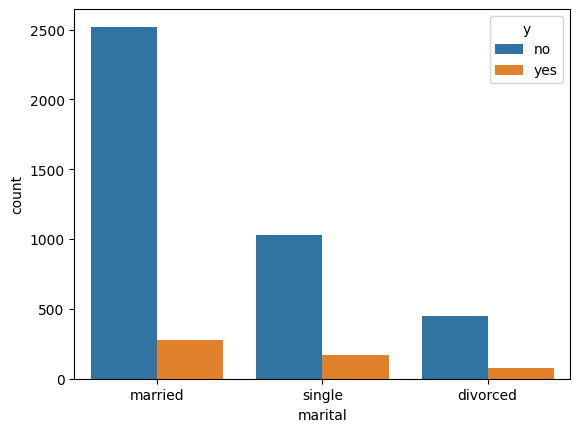

In [13]:
sns.countplot(x='marital', hue='y', data=bank)


In [14]:
bank['age_group'] = pd.cut(bank['age'], bins=[18, 30, 45, 60, 100], labels=['18–30', '31–45', '46–60', '60+'])
bank.groupby('age_group')['y'].value_counts(normalize=True)


C:\Users\user\AppData\Local\Temp\ipykernel_24452\2644176739.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bank.groupby('age_group')['y'].value_counts(normalize=True)


age_group  y  
18–30      no     0.857595
           yes    0.142405
31–45      no     0.901993
           yes    0.098007
46–60      no     0.891433
           yes    0.108567
60+        no     0.622047
           yes    0.377953
Name: proportion, dtype: float64

<Axes: xlabel='age_group', ylabel='count'>

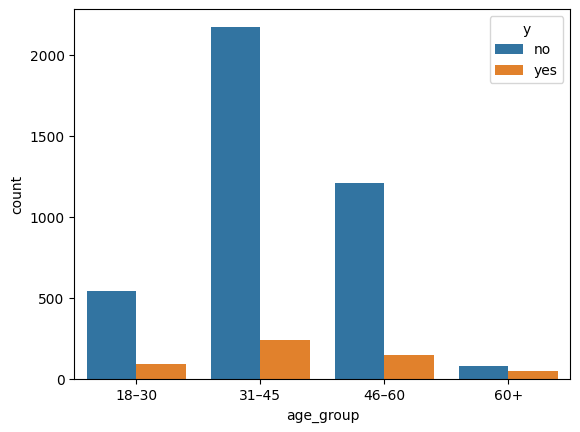

In [15]:
sns.countplot(x='age_group', hue='y', data=bank)


In [16]:
bank_full = pd.read_csv('bank-full.csv', sep=';')
bank_full.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
bank_add = pd.read_csv('bank-additional.csv', sep=';')
bank_add.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [18]:
bank_add_full = pd.read_csv('bank-additional-full.csv', sep=';')
bank_add_full.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
bank_add_full.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [20]:
bank_full.groupby('contact')['y'].value_counts(normalize=True)

contact    y  
cellular   no     0.850811
           yes    0.149189
telephone  no     0.865795
           yes    0.134205
unknown    no     0.959293
           yes    0.040707
Name: proportion, dtype: float64

<Axes: xlabel='contact', ylabel='count'>

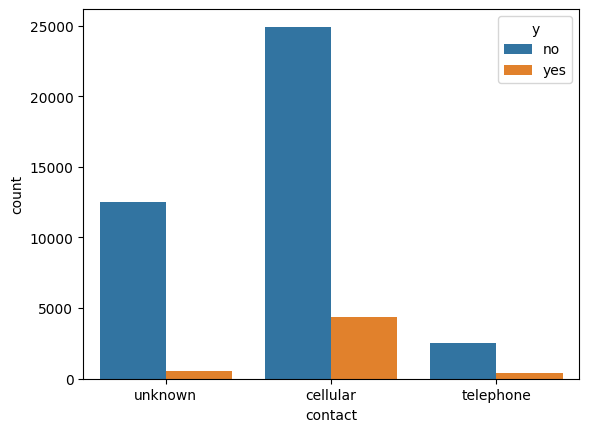

In [21]:
sns.countplot(x='contact', hue='y', data=bank_full)


In [22]:
bank_full.groupby('month')['y'].value_counts(normalize=True)

month  y  
apr    no     0.803206
       yes    0.196794
aug    no     0.889867
       yes    0.110133
dec    no     0.532710
       yes    0.467290
feb    no     0.833522
       yes    0.166478
jan    no     0.898788
       yes    0.101212
jul    no     0.909065
       yes    0.090935
jun    no     0.897772
       yes    0.102228
mar    yes    0.519916
       no     0.480084
may    no     0.932805
       yes    0.067195
nov    no     0.898489
       yes    0.101511
oct    no     0.562331
       yes    0.437669
sep    no     0.535406
       yes    0.464594
Name: proportion, dtype: float64

<Axes: xlabel='contact', ylabel='count'>

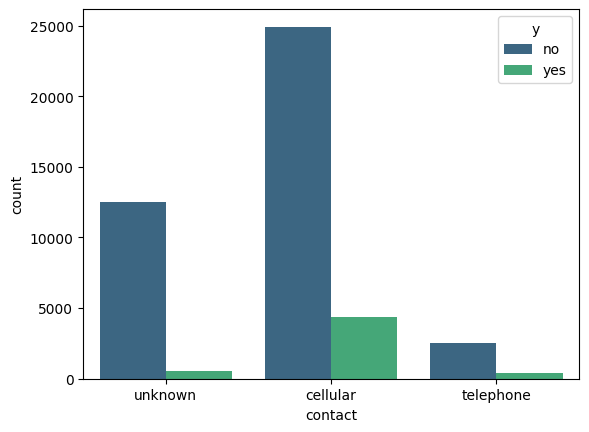

In [23]:
sns.countplot(x='contact', hue='y', data=bank_full, palette='viridis')


In [24]:
bank_full.groupby('campaign')['y'].value_counts(normalize=True)


campaign  y  
1         no     0.854024
          yes    0.145976
2         no     0.887965
          yes    0.112035
3         no     0.888064
                   ...   
50        no     1.000000
51        no     1.000000
55        no     1.000000
58        no     1.000000
63        no     1.000000
Name: proportion, Length: 70, dtype: float64

<Axes: xlabel='campaign', ylabel='count'>

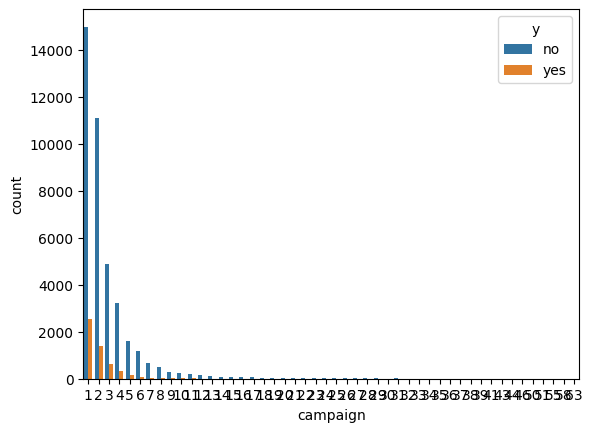

In [25]:
sns.countplot(x='campaign', hue='y', data=bank_full)


In [26]:
bank_full[bank_full['y'] == 'yes']['duration'].mean()


np.float64(537.2945736434109)

In [27]:
bank_full[bank_full['y'] == 'no']['duration'].mean()


np.float64(221.18280647262162)

In [28]:
bank_full.groupby(['month', 'contact'])['y'].value_counts(normalize=True)


month  contact    y  
apr    cellular   no     0.804547
                  yes    0.195453
       telephone  no     0.804020
                  yes    0.195980
       unknown    yes    0.833333
                           ...   
sep    cellular   no     0.482833
       telephone  no     0.621212
                  yes    0.378788
       unknown    no     0.936170
                  yes    0.063830
Name: proportion, Length: 71, dtype: float64

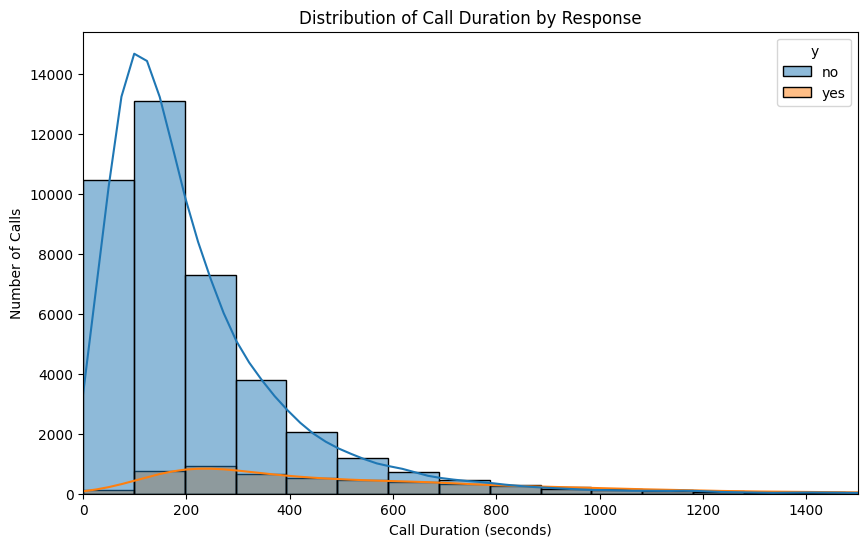

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=bank_full, x='duration', hue='y', bins=50, kde=True)
plt.title("Distribution of Call Duration by Response")
plt.xlabel("Call Duration (seconds)")
plt.ylabel("Number of Calls")
plt.xlim(0, 1500)  #zoom in to cut extreme values
plt.show()


In [30]:
#Machine Learning
bank_full.drop(columns=['duration'])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,unknown,no


In [31]:
bank_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000
